# SVM for Regression problems

Is posibble to use SVM algortihm to infer a linear regression in a dataset.
Classic SVM is based on maximize the gap (distance) between points without touching them.
If now we try to minimize the distance to the line but including the maximum possible data points.

- Loss Function
$$ Loss = \frac{1}{n}\sum_{i=1}^n \max(0, |y_i-(Ax_i+b)-\epsilon|$$
Where:
- $\varepsilon$: Parameter that forces the loss function to converge to 0 incluiding all the data points.

### Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
%config Completer.use_jedi = False

session = tf.Session()
iris = datasets.load_iris()

### Data ingestion - Train/test dataset split

In [2]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace = False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

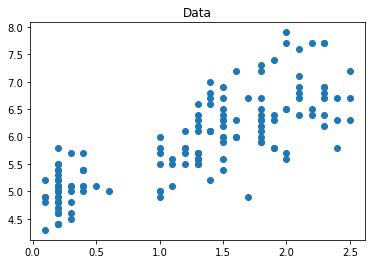

In [3]:
plt.plot(x_vals, y_vals, 'o')
plt.title('Data')
plt.show()

### Tensorflow variables declaration
- Needed variables
- Loss function definition
- Accuracy metric
- Variable initilization

In [12]:
batch_size = 100    #If the number is too small the convergence would be affected
learning_rate = 0.05

x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

A = tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))

In [13]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [14]:
epsilon = tf.constant(0.5)
loss = tf.reduce_mean(tf.maximum(0.0, tf.subtract(tf.abs(tf.subtract(model_output, y_target)), epsilon)))

In [15]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
session.run(init)

### Model training

In [16]:
train_loss = []
test_loss = []

for i in range(400):
    rand_idx = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x,
                                         y_target: rand_y})

    
    train_loss_temp = session.run(loss, feed_dict = {x_data: np.transpose([x_vals_train]),
                                                        y_target: np.transpose([y_vals_train])})
    train_loss.append(train_loss_temp)
    
    test_loss_temp = session.run(loss, feed_dict = {x_data: np.transpose([x_vals_test]),
                                                    y_target: np.transpose([y_vals_test])})
    test_loss.append(test_loss_temp)
    if (i+1)%50 == 0:
        print('Step #'+str(i+1)+
              ', A = '+str(session.run(A))+
              ', b = '+str(session.run(b))+
              ', Train Loss = '+str(train_loss_temp)+
              ', Test Loss = '+str(test_loss_temp))

Step #50, A = [[2.1493986]], b = [[2.338182]], Train Loss = 0.7417987, Test Loss = 0.68773615
Step #100, A = [[1.9682486]], b = [[3.1206818]], Train Loss = 0.43265837, Test Loss = 0.44268647
Step #150, A = [[1.5839484]], b = [[3.7336826]], Train Loss = 0.2274303, Test Loss = 0.235333
Step #200, A = [[1.3301486]], b = [[4.1656823]], Train Loss = 0.1237656, Test Loss = 0.14084856
Step #250, A = [[1.1695483]], b = [[4.377681]], Train Loss = 0.09542818, Test Loss = 0.10568641
Step #300, A = [[1.0759987]], b = [[4.494681]], Train Loss = 0.08651626, Test Loss = 0.09277994
Step #350, A = [[1.0257986]], b = [[4.5676794]], Train Loss = 0.08323728, Test Loss = 0.08596824
Step #400, A = [[0.98964846]], b = [[4.6251774]], Train Loss = 0.08122672, Test Loss = 0.08024125


Text(0.5, 1.0, 'Training Loss')

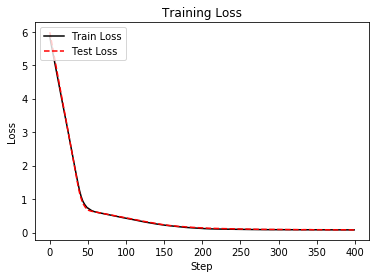

In [17]:
plt.plot(train_loss, 'k', label = 'Train Loss')
plt.plot(test_loss, 'r--', label = 'Test Loss')
plt.legend(loc = 'upper left')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')

### Linear equation

In [10]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
widht = session.run(epsilon)

best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
    best_fit.append(slope*i + intercept)
    best_fit_upper.append(slope*i + intercept + widht)
    best_fit_lower.append(slope*i + intercept - widht)

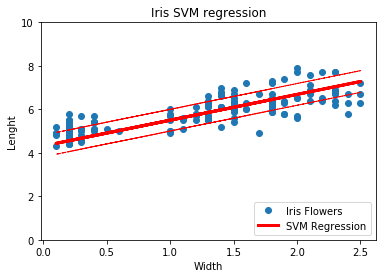

In [11]:
plt.plot(x_vals, y_vals, 'o', label = 'Iris Flowers')
plt.plot(x_vals, best_fit, 'r-', label = 'SVM Regression', linewidth = 3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth = 1)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth = 1)
plt.legend(loc = 'lower right')
plt.ylim([0,10])
plt.xlabel('Width')
plt.ylabel('Lenght')
plt.title('Iris SVM regression')
plt.show()
